In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt 

import CRISPR_TargetRecognition as CRISPR 
reload(CRISPR);


import seaborn as sns 
sns.set_style('ticks');
current_color = sns.color_palette(); 
w
def chi_squared(xdata, ydata, yerr, params,model):
    model_result = model(xdata,params)
    residual = ( (model_result-ydata)/yerr )**2
    return np.sum(residual)


In [8]:
ydata = np.loadtxt('generated_pclv_noise_0.0.txt')
xdata = np.loadtxt('Pattanayak_CLTA1_100nM_NGG_sequences.txt')
yerr  = np.ones(len(ydata))
model = CRISPR.Pclv

DeltaPAM = 0.2
DeltaC = 0.5
DeltaI = 4.0
DeltaCLV = 2.0
Delta = [DeltaPAM, DeltaC, DeltaI, DeltaCLV]

# print chi_squared(xdata[0:5],ydata[0:5],yerr[0:5],Delta,model)
# print ydata[0:5]

In [7]:
training_set = np.loadtxt('Pattanayak_CLTA1_100nM_NGG_sequences.txt')
training_set[0]

len(training_set)

18476

In [8]:
x = np.loadtxt('generated_pclv_noise_0.txt')

In [7]:
xdata.shape 

(18476, 20)

In [21]:
CRISPR.compare_to_on_target([xdata[0]],Delta)

array([ 1.])

In [19]:
X  = np.array([16,16,16,16])
U  = np.array([15,15,15,15])
L  = np.array([0.1,0.1,0.1,0.1])
print np.array( (X < U)  )
print np.array( (X > L) )
print  (X < U).all() and (X > L).all() 
print (X > L).all()

[False False False False]
[ True  True  True  True]
False
True


In [44]:
noise_amplitude=0.99 
noise = np.random.uniform(-noise_amplitude,noise_amplitude,size=50)
print noise 

[ 0.85577419  0.38872106 -0.97296815  0.31290554 -0.59914316 -0.05546368
 -0.20388726  0.52613971 -0.64470765 -0.89675844  0.25244474 -0.94793567
 -0.33064538  0.71568479  0.41080553 -0.48331728  0.66635327  0.54588504
 -0.54018066 -0.75001178 -0.05532799 -0.82200162  0.98975812 -0.48804185
 -0.88470045  0.17236692  0.5456625  -0.08730889 -0.75351172  0.33801004
  0.00120698  0.09930752  0.02263765 -0.94312809 -0.2785503  -0.84355042
  0.16576096 -0.97968469  0.30940938 -0.93616658 -0.78907106  0.64288282
 -0.71319553  0.79505633 -0.06355764  0.77127635 -0.82766151 -0.31753677
  0.81482244 -0.28809486]


In [45]:
P = CRISPR.compare_to_on_target(xdata[0:len(noise)],Delta) 
print P + noise*P 

[ 1.85577419  1.36524624  0.0265749   1.2907123   0.39562713  0.9322136
  0.7857264   1.50982256  0.35149364  0.10213772  1.035041    0.04302682
  0.5531657   1.51805306  1.2482932   0.45716544  1.54042004  1.42905609
  0.42506888  0.23754668  0.89765708  0.16913967  1.92329504  0.49485742
  0.11144824  1.14516966  1.50980531  0.89151796  0.07083872  0.38453317
  0.28773872  0.43854334  0.40795767  0.02268773  0.37640895  0.08162596
  0.60822377  0.01303287  0.84002466  0.04095102  0.15720976  1.22447499
  0.21376138  0.03542769  0.01848187  0.03495836  0.00553644  0.02192437
  0.05830182  0.03693147]


## fit to generated noisy training data 
Sequence library of Pattanayak used. 
Noise added to  theoretically calculated data. Relative noise amplitude chosen. 
\begin{equation}
    P_{\rm{clv}}^{\rm{data}} = P_{\rm{clv}}^{\rm{theory}} (1 + \sigma)
\end{equation}
with $\sigma$ being the noise amplitude. 

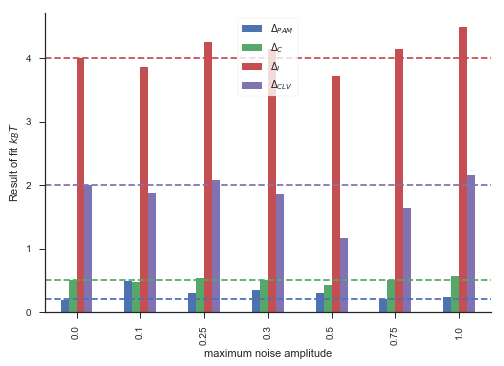

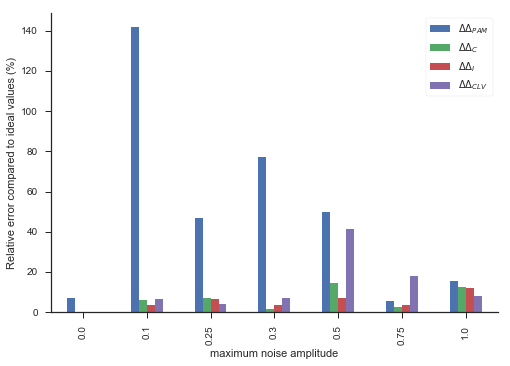

In [51]:
noisevalues = np.loadtxt('noisevalues.txt')

# Exact values at zero noise 
PAM = 0.2
C = 0.5
I = 4.0
CLV = 2.0

DeltaPAM = []
DeltaC = []
DeltaI = []
DeltaCLV = []
for noise_amp in noisevalues:
    fit_result = pd.read_table('fit_10_2_2018_noise_'+ str(noise_amp)+'.txt')
    DeltaPAM.append( fit_result.iloc[-1]['Parameter 1']  )
    DeltaC.append( fit_result.iloc[-1]['Parameter 2']  )
    DeltaI.append( fit_result.iloc[-1]['Parameter 3']  )
    DeltaCLV.append( fit_result.iloc[-1]['Parameter 4']  )

mimic_noise = pd.DataFrame()
mimic_noise['$\\Delta_{PAM}$']= DeltaPAM
mimic_noise['$\\Delta_{C}$'] = DeltaC
mimic_noise['$\\Delta_{I}$'] = DeltaI
mimic_noise['$\\Delta_{CLV}$'] = DeltaCLV
mimic_noise['noise_amplitude'] = noisevalues
mimic_noise.plot(kind='bar',x='noise_amplitude')
sns.despine()
plt.legend(loc='upper center',frameon=True)
plt.ylabel('Result of fit $k_BT$')
plt.xlabel('maximum noise amplitude')
plt.axhline(PAM, color=sns.color_palette()[0],linestyle='dashed')
plt.axhline(C,color=sns.color_palette()[1],linestyle='dashed')
plt.axhline(I,color=sns.color_palette()[2],linestyle='dashed')
plt.axhline(CLV,color=sns.color_palette()[3],linestyle='dashed')


mimic_noise['$\Delta\Delta_{PAM}$']= np.abs((np.array(DeltaPAM) - PAM)/PAM *100)
mimic_noise['$\Delta\Delta_{C}$'] = np.abs((np.array(DeltaC) - C)/C *100)
mimic_noise['$\Delta\Delta_{I}$'] = np.abs((np.array(DeltaI) - I)/I *100)
mimic_noise['$\Delta\Delta_{CLV}$'] = np.abs((np.array(DeltaCLV) - CLV)/CLV *100)
mimic_noise[['$\Delta\Delta_{PAM}$' ,'$\Delta\Delta_{C}$','$\Delta\Delta_{I}$','$\Delta\Delta_{CLV}$','noise_amplitude']].plot(
    kind='bar', x='noise_amplitude')
sns.despine()
plt.legend(loc='best',frameon=True)
plt.ylabel('Relative error compared to ideal values (%)')
plt.xlabel('maximum noise amplitude')

In [12]:
noise_amp = noisevalues[0]
fit_result = pd.read_table('fit_10_2_2018_noise_'+ str(noise_amp)+'.txt')


0.18552978965999997

# Fit to entire dataset 

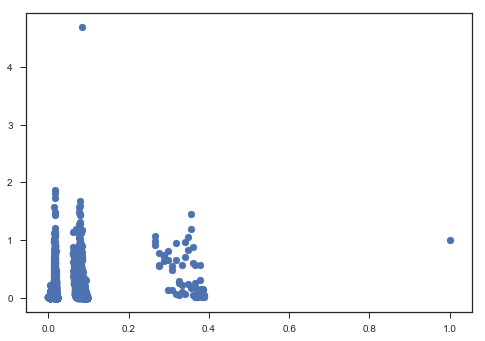

In [21]:
score_file = '../data/20_2_2018/Pattanayak_CLTA1_100nM_NGG_scores.txt'
scores = np.loadtxt(score_file)
seq_file = '../data/20_2_2018/Pattanayak_CLTA1_100nM_NGG_sequences.txt'
sequences = np.loadtxt(seq_file)
fitvals = '../data/20_2_2018/fit2.txt'
df = pd.read_table(fitvals)



DeltaPAM = df.iloc[-1]['Parameter 1']
DeltaC = df.iloc[-1]['Parameter 2']
DeltaI = df.iloc[-1]['Parameter 3']
DeltaCLV = df.iloc[-1]['Parameter 4']
Delta = [DeltaPAM, DeltaC, DeltaI, DeltaCLV]

Pclv = CRISPR.compare_to_on_target(sequences,Delta,model='minimal_model')



plt.scatter(Pclv, scores)

In [66]:

n = 4
x = np.arange(10)+1
print x[-n::]
print x[:n]

[ 7  8  9 10]
[1 2 3 4]


In [3]:
x = pd.read_excel('../data/Pattanayak_Liu_NBT_2673_Data.xlsx')

In [12]:
Pattanayak = x 
guide_name = 'CLTA1'
concentration = '100nM'
PAM_seq = 'NGG'
training = Pattanayak[(Pattanayak.Concentration == concentration)
                      & (Pattanayak.PAM == PAM_seq)
                      & (Pattanayak.name == guide_name)]



filename = "Pattanayak_" + guide_name + "_" + concentration + "_" + PAM_seq + "_scores.txt"


In [13]:
T = np.array(training.Score)
np.savetxt(filename,T)

In [24]:
PATH_HPC05 = '/home/mklein1/Training_Pclv/'
date = '20_2_2018/'

f = open('jobs_full_dataset_' + guide_name + "_" + concentration + "_" + PAM_seq +'.txt','w')
filename1 =  PATH_HPC05 + date +"Pattanayak_" + guide_name + "_" + concentration + "_" + PAM_seq + "_sequences.txt"
filename2 =   PATH_HPC05 + date +"Pattanayak_" + guide_name + "_" + concentration + "_" + PAM_seq + "_scores.txt"

nmbr_runs = 3 
for i in range(1,nmbr_runs+1):
    results =  PATH_HPC05 + date +'fit' +str(i) + '.txt'
    monitor =  PATH_HPC05 + date +'monitor' + str(i) + '.txt'
    f.write( filename1 + ' ' + filename2 + ' ' + results + ' ' + monitor + '\n')
f.close()